The accuracy score of K-Mean:  0.09333333333333334
The Confusion matrixof K-Mean:  [[ 0 50  0]
 [ 2  0 48]
 [36  0 14]]
The accuracy score of EM:  0.3333333333333333
The Confusion matrix of EM:  [[ 0 50  0]
 [45  0  5]
 [ 0  0 50]]


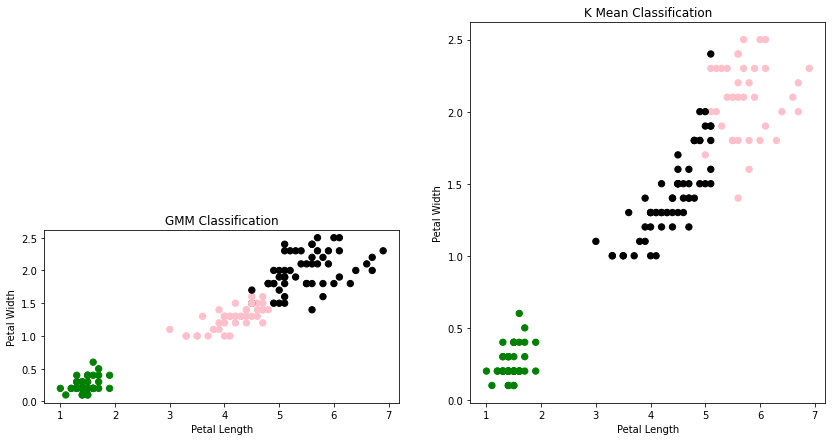

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np

iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']

model = KMeans(n_clusters=3)
model.fit(X)


plt.figure(figsize=(14,7))

colormap = np.array(['pink', 'green', 'black'])

# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('The accuracy score of K-Mean: ',sm.accuracy_score(y, model.labels_))
print('The Confusion matrixof K-Mean: ',sm.confusion_matrix(y, model.labels_))


from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
#xs.sample(5)

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)

y_gmm = gmm.predict(xs)
#y_cluster_gmm

plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_gmm], s=40)
plt.title('GMM Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

print('The accuracy score of EM: ',sm.accuracy_score(y, y_gmm))
print('The Confusion matrix of EM: ',sm.confusion_matrix(y, y_gmm))